<a href="https://colab.research.google.com/github/KhoaKD59/Exercies_AI/blob/main/Python2032023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-af583ea64d7e>:48: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
<ipython-input-7-af583ea64d7e>:49: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
<ipython-input-7-af583ea64d7e>:50: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)


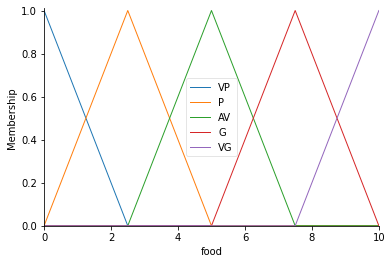

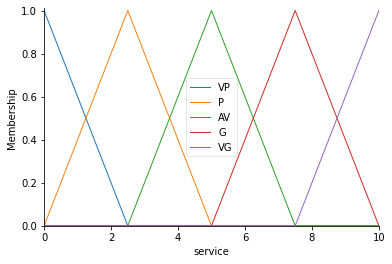

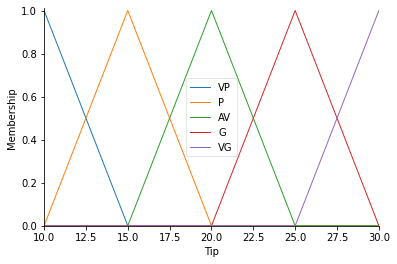

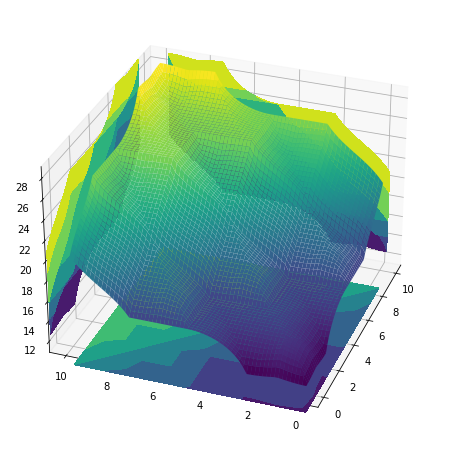

In [7]:
#pip install scikit-fuzzy

from networkx.algorithms.bipartite import projection
from skfuzzy.control.controlsystem import Consequent
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
universe = np.linspace(0,10,61)
universe1 = np.linspace(10,30,61)
food = ctrl.Antecedent(universe, 'food') # biến đầu vào
service = ctrl.Antecedent(universe,'service')

#output
tip = ctrl.Consequent(universe1, 'Tip') # trả ra kq
names =['VP', 'P', 'AV', 'G', 'VG'] #VP is very poor, P, AV is avgare, G is Good, VG is very good
food.automf(names=names)
service.automf(names=names)
tip.automf(names=names)
food.view()
service.view()
tip.view()

rule0 = ctrl.Rule(antecedent=((food['VP']&service['VP'])|(food['P']&service['VP'])|(food['VP']&service['P'])),consequent=tip['VP'],label= 'ruleVP')
rule1 = ctrl.Rule(antecedent=((food['G']&service['VP'])|(food['AV']&service['VP'])|(food['AV']&service['P'])|(food['P']&service['P'])|(food['P']&service['AV'])|(food['VP']&service['AV'])|(food['VP']&service['G'])),consequent=tip['P'],label= 'ruleP')
rule2 = ctrl.Rule(antecedent=((food['VG']&service['VP'])|(food['G']&service['P'])|(food['AV']&service['AV'])|(food['P']&service['G'])|(food['VP']&service['VG'])),consequent=tip['AV'],label= 'ruleAV')
rule3 = ctrl.Rule(antecedent=((food['VG']&service['P'])|(food['VG']&service['AV'])|(food['G']&service['AV'])|(food['G']&service['G'])|(food['AV']&service['G'])|(food['AV']&service['VG'])|(food['P']&service['VG'])),consequent=tip['G'],label= 'ruleG')
rule4 = ctrl.Rule(antecedent=((food['VG']&service['G'])|(food['VG']&service['VG'])|(food['G']&service['VG'])),consequent=tip['VG'],label= 'ruleVG')

system = ctrl.ControlSystem(rules=[rule0, rule1, rule2,rule3,rule4])
sim = ctrl.ControlSystemSimulation(system,flush_after_run= 61*61+1)
upsampled = np.linspace(0,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['food']= x[i,j]
    sim.input['service']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['Tip']
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure(figsize =(8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap='viridis',linewidth = 0.4)
cset = ax.contourf(x,y,z,zdir='z',offset=9,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='x',offset=11,cmap='viridis',anpha=0.5)
cset = ax.contourf(x,y,z,zdir='y',offset=11,cmap='viridis',anpha=0.5)
ax.view_init(30,200)